### Objective
##### 1. Explore movies rating data ( MovieLens data)
##### 2. User-Item Recommendation system
##### 3. User-User; Item- Item Recommendation System.

### Data Sources
GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set. Before using these data sets, please review their README files for the usage licenses and other details.

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100004 ratings and 1296 tag applications across 9125 movies. These data were created by 671 users between January 09, 1995 and October 16, 2016. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv. We use movies.csv, ratings.csv in this analysis only.

###### Ratings Data (ratings.csv)
Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

###### Movies Data (movies.csv)
Each line of this file after the header row represents one movie, and has the following format: movieId,title,genres

Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. 

Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

- Action

- Adventure

- Animation

- Children's

- Comedy

- Crime

- Documentary

- Drama

- Fantasy

- Film-Noir

- Horror

- Musical

- Mystery

- Romance

- Sci-Fi

- Thriller

- War

- Western

- (no genres listed)


## Index
### A. Import library, data and data exploration
### B. Exploratory Data Analysis
### C. User-Item Recommendation system
### D. User-User Recommendation system & Item-Item Recommendation system

----------------------------------------------------------------------------------------------
### A. Import library, data and data exploration

In [1]:
#import library
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.expand_frame_repr', False) #show all columns in dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
#Import data from csv file
rating= pd.read_csv('ratings.csv', usecols=["userId","movieId","rating"])
movies = pd.read_csv('movies.csv',usecols=["movieId","title","genres"])

In [4]:
rating.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

In [5]:
movies.head()

movieId                               title                                       genres
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy
2        3             Grumpier Old Men (1995)                               Comedy|Romance
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance
4        5  Father of the Bride Part II (1995)                                       Comedy

In [6]:
#Check data infomation
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
userId     100004 non-null int64
movieId    100004 non-null int64
rating     100004 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [7]:
#check number of Null value
rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [8]:
#Check data infomation
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [9]:
#check number of Null value
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### B.  Exploratory Data Analysis

In [10]:
# Get summary statistics of rating
rating['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

##### Comment:
- Average rating is 3.54
- Minimum rating is 0.5 and maximum rating is 5

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


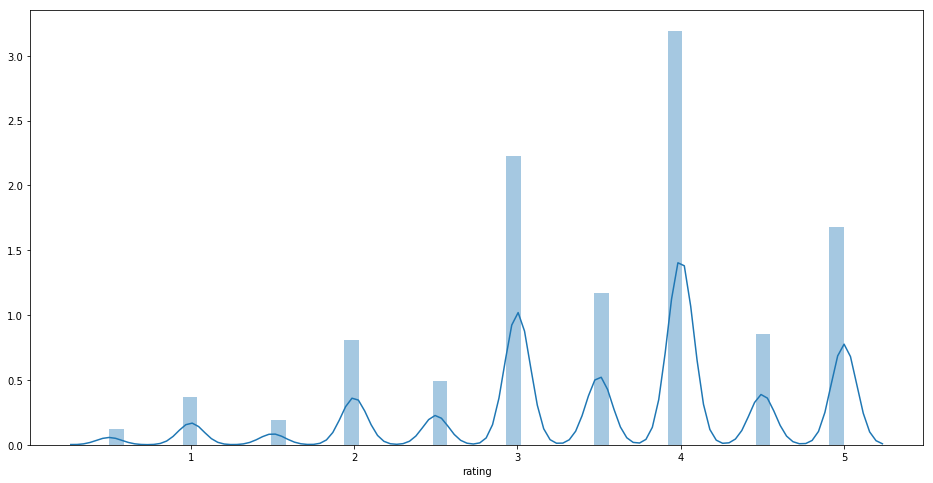

In [11]:
# Display distribution of rating
plt.subplots(figsize=(16,8))
sns.distplot(rating['rating'])

##### Comment:
- Most frequent rating is 4, 3 and 5
- Ratings with decimal number (3.5 , 4.5) are less frequent then rounded ratings.

In [12]:
data = pd.merge(movies, rating)
data.head()
rating_mean=data[['title','rating']].groupby('title').mean()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


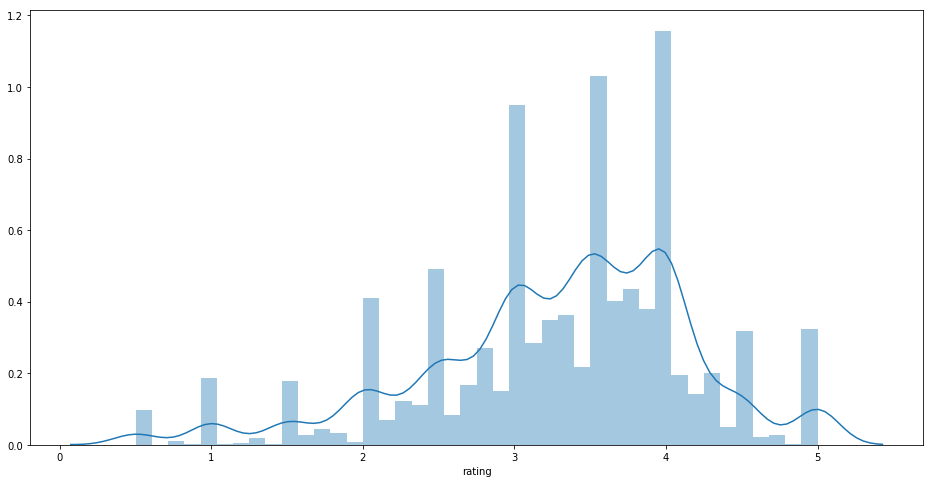

In [13]:
# Display distribution of rating
plt.subplots(figsize=(16,8))
sns.distplot(rating_mean['rating'])

##### Comment:
- Most average frequent rating is 4 and 3.6
- The distribution is a little different with the rating only.

In [14]:
print("Top 20 movies with highest average rating") 
print(rating_mean.sort_values(['rating'],ascending=False).head(20))

Top 20 movies with highest average rating
                                                    rating
title                                                     
Ivan Vasilievich: Back to the Future (Ivan Vasi...     5.0
Alien Escape (1995)                                    5.0
Boiling Point (1993)                                   5.0
Bone Tomahawk (2015)                                   5.0
Borgman (2013)                                         5.0
Survive and Advance (2013)                             5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)         5.0
Last Dragon, The (1985)                                5.0
Boy Crazy (2009)                                       5.0
Brandon Teena Story, The (1998)                        5.0
Straight-Jacket (2004)                                 5.0
Storefront Hitchcock (1997)                            5.0
Latter Days (2003)                                     5.0
Howl (2010)                                            5.0
Step Into Liqu

In [15]:
print("Top 20 movies with lowest average rating") 
print(rating_mean.sort_values(['rating'],ascending=False).tail(20))

Top 20 movies with lowest average rating
                                                    rating
title                                                     
SuperBabies: Baby Geniuses 2 (2004)                    0.5
Superfast! (2015)                                      0.5
Catfish in Black Bean Sauce (2000)                     0.5
Paul Blart: Mall Cop (2009)                            0.5
Trespass (2011)                                        0.5
Beverly Hills Chihuahua (2008)                         0.5
Worth Winning (1989)                                   0.5
Bangkok Dangerous (2008)                               0.5
Indestructible Man (1956)                              0.5
Tarzan, the Ape Man (1981)                             0.5
Fraternity Vacation (1985)                             0.5
Merry War, A (1997)                                    0.5
Whiteboyz (1999)                                       0.5
Malibu's Most Wanted (2003)                            0.5
Adventures of M

Text(0,0.5,'Movies Title')

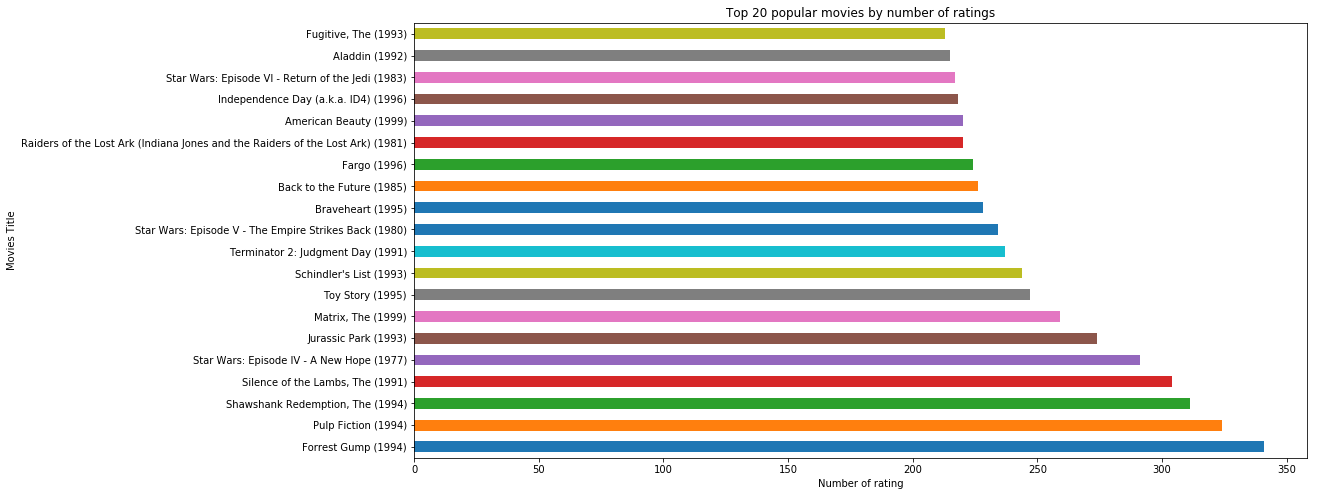

In [16]:
rating_total = data.groupby('title').size()
plt.subplots(figsize=(16,8))
rating_total.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 popular movies by number of ratings')
plt.xlabel('Number of rating')
plt.ylabel('Movies Title')

### C. User-Item Recommendation system

In [17]:
#create a user-item matrix
rating_matrix = rating.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
rating_matrix.iloc[:20,:20]

movieId   1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20
userId                                                                                                     
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5        0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
13       5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
15       2.0  2.0  0.0  0.0  4.5  4.0  0.0  0.0  0.0  3.0  2.5  0.0  0.0  2.5  0.0  3.5  3.0  0.0  1.0  0.0
16       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
17       0.0  0.0  0.0  0.0  0.0  4.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
18       0.0  0.0  0.0  0.0  3.0  4.0  3.0  0.0  3.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  4.0  3.0  0.0  0.0
19       3.0  3.0  3.0  3.0  0.0  3.0  3.0  0.0  3.0  3.0  3.0  0.0  0.0  5.0  0.0  5.0  0.0  0.0  0.0  0.0
20       3.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [18]:
#Define collaborative filtering function
class CollaborativeFiltering():

    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.

        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """

        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)


In [19]:
#training the data using Collaborative filtering
R = np.array(rating_matrix.values)
cf = CollaborativeFiltering(R, K=20, alpha=0.001, beta=0.01, iterations=100)
cf.train()
print("P x Q:")
print(cf.full_matrix())
print(cf.get_rating(1, 1))

Iteration: 10 ; error = 288.6813
Iteration: 20 ; error = 281.2285
Iteration: 30 ; error = 276.9484
Iteration: 40 ; error = 273.8065
Iteration: 50 ; error = 271.0616
Iteration: 60 ; error = 268.2692
Iteration: 70 ; error = 265.0090
Iteration: 80 ; error = 260.9383
Iteration: 90 ; error = 255.9781
Iteration: 100 ; error = 250.3919
P x Q:
[[2.98128376 2.47536838 2.20056853 ... 2.74707598 2.51497777 2.78897255]
 [3.82389866 3.3351279  3.01746402 ... 3.56878943 3.36342024 3.53908934]
 [3.70790147 3.20934483 2.91962477 ... 3.46725108 3.26756644 3.50624959]
 ...
 [3.70085276 3.29351876 3.01655175 ... 3.51126599 3.33011582 3.53855605]
 [3.90719055 3.47277604 3.15148924 ... 3.60131288 3.48517978 3.61018952]
 [3.93049582 3.45674907 3.13494797 ... 3.67025844 3.49650994 3.70879851]]
3.335127902228217


In [20]:
#input User ID and Movies ID want to check
user = int(input('Enter User ID: '))
movie = int(input('Enter Movie ID: '))
rating_user = data.groupby('userId').size()
print("+ User", user ,"has already rated",rating_user[user],"movies")
print("+ Prediction rating for User", user ,"for", movies.loc[(movies.movieId==movie),"title"].values[0] ,":","%8.3f"%cf.get_rating(user-1, movie-1))
top_5_idx_UI = np.argsort(cf.full_matrix()[user-1,:])[-5:][::-1]
print ('+ The 5 highest predicted rating movies for User', user )
j=1
for i in top_5_idx_UI:
    print (j,"-",movies.loc[(movies.movieId==(i-1)),"title"].values[0], "with rating", "%8.3f"% cf.full_matrix()[user-1,:][i])
    j+=1

Enter User ID: 1
Enter Movie ID: 31
+ User 1 has already rated 20 movies
+ Prediction rating for User 1 for Dangerous Minds (1995) :    2.375
+ The 5 highest predicted rating movies for User 1
1 - New Jersey Drive (1995) with rating    3.590
2 - Substitute, The (1996) with rating    3.569
3 - Kingpin (1996) with rating    3.535
4 - Wallace & Gromit: A Close Shave (1995) with rating    3.532
5 - Thomas Crown Affair, The (1999) with rating    3.498


In [21]:
print("User-Item Collaborative Filtering MSE =", "%8.3f"% cf.mse())

User-Item Collaborative Filtering MSE =  250.392


#### Comment:
- With given user Id and Movie Id, the model will give the predicted rating for particular movies from that user. 
- Moreover, the model can help to predict top highest predicted rating movies for that user. 
- The MSE is quite high due to high number of cases in data.

### D. User-User Recommendation system & Item-Item Recommendation system

In [22]:
#Split data into train and test data with proportion of 80-20
rating_train, rating_test = train_test_split(rating, test_size=0.2)
rating_train_matrix = rating_train.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
rating_test_matrix = rating_test.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)

In [23]:
# create a similarity matrix between users and items with Pearson Correlation
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(rating_train_matrix, metric='correlation')
item_similarity = pairwise_distances(rating_train_matrix.T, metric='correlation')

In [24]:
# Define a function to predict users or items
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = np.mean(ratings,axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred
user_prediction = predict(rating_train_matrix.values, user_similarity, type='user')
item_prediction = predict(rating_train_matrix.values, item_similarity, type='item')

In [25]:
user_prediction

array([[ 1.10543129,  0.41198318,  0.16064237, ..., -0.03772083,
        -0.0407441 , -0.03797607],
       [ 1.12240802,  0.39443784,  0.180699  , ..., -0.01567323,
        -0.01883018, -0.01567627],
       [ 1.10263258,  0.41647811,  0.17868364, ..., -0.02445299,
        -0.02735653, -0.02392543],
       ...,
       [ 1.10650794,  0.42155243,  0.16856718, ..., -0.03022741,
        -0.03326322, -0.03024725],
       [ 1.0758544 ,  0.41189502,  0.16734052, ..., -0.03101182,
        -0.034162  , -0.03122737],
       [ 1.08780029,  0.44371859,  0.2068994 , ...,  0.00463127,
         0.00164083,  0.0048285 ]])

In [26]:
# listing top 10 similar users of input user
user = int(input('Enter User ID: '))
top_10_idx_U = np.argsort(user_prediction[:,user-1])[-10:][::-1]
print ('+ Top 10 similar users to User', user )
j=1
for i in top_10_idx_U:
    print (j,"-","User", i+1)
    j+=1

Enter User ID: 1
+ Top 10 similar users to User 1
1 - User 547
2 - User 564
3 - User 73
4 - User 624
5 - User 452
6 - User 15
7 - User 30
8 - User 468
9 - User 380
10 - User 294


In [27]:
item_prediction

array([[0.00415744, 0.0041567 , 0.00421851, ..., 0.00435522, 0.00435522,
        0.00441746],
       [0.02542587, 0.02305705, 0.02551123, ..., 0.02678912, 0.02678912,
        0.02848261],
       [0.01657925, 0.01676761, 0.01786734, ..., 0.01789631, 0.01789631,
        0.01916327],
       ...,
       [0.01103222, 0.01125392, 0.01145557, ..., 0.01169676, 0.01169676,
        0.0122725 ],
       [0.00947352, 0.01027598, 0.0107352 , ..., 0.01103087, 0.01103087,
        0.01143482],
       [0.03976778, 0.04301312, 0.04503058, ..., 0.04545878, 0.04545878,
        0.04776543]])

In [28]:
# listing top 10 similar movies of input user
movie = int(input('Enter Movie ID: '))
top_10_idx_I = np.argsort(item_prediction[movie-1,:])[-10:][::-1]
top_10_values_I = [item_prediction[movie-1,:][i] for i in top_10_idx_I]

print ('+ Top 10 recommended movies to', movies.loc[(movies.movieId==movie),"title"].values[0])
j=1
for i in top_10_idx_I:
    print (j,"-",movies.loc[(movies.index==(i-1)),"title"].values[0])
    j+=1

Enter Movie ID: 21
+ Top 10 recommended movies to Get Shorty (1995)
1 - Vincent (1982)
2 - Flaming Creatures (1963)
3 - Perks of Being a Wallflower, The (2012)
4 - Hot Tub Time Machine (2010)
5 - I Love You, Man (2009)
6 - Unthinkable (2010)
7 - Vow, The (2012)
8 - Rite, The (2011)
9 - Immature, The (Immaturi) (2011)
10 - Hair (1979)


In [29]:
# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [30]:
# RMSE on the test data
print('User-user RMSE: ' + str(rmse(user_prediction, rating_test_matrix.values)))
print('Item-item RMSE: ' + str(rmse(item_prediction, rating_test_matrix.values)))

User-user RMSE: 3.595686900874068
Item-item RMSE: 3.6284454260936854


In [31]:
# RMSE on the train data
print('User-user RMSE: ' + str(rmse(user_prediction, rating_train_matrix.values)))
print('Item-item RMSE: ' + str(rmse(item_prediction, rating_train_matrix.values)))

User-user RMSE: 3.3400815740078444
Item-item RMSE: 3.5737178937363057
